<a href="https://colab.research.google.com/github/saikrishna232/Advanced-House-Price-Prediction/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Description:**

Objective of the dataset is to predict whether a patient has diabetes based on certain diagnostic measurements like BMI,Insulin,age etc. We have a one target variable "Outcome" in the dataset.

**Libraries and Data Import**

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/saikrishna232/Diabetes_Prediction/main/Diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [76]:
for i in df.columns:
  if 0 in df[i].unique():
    print(i)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
Outcome


# **Observations:**

1. We have 768 records and 9 features in the dataset.
2. We don't have any categorical features in the dataset.
3. We don't have missing values in any feature but we have zeroes in the    independent features which represents a missing value.
4. We have two instances(0 and 1) in target class.

**Data Visualization**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


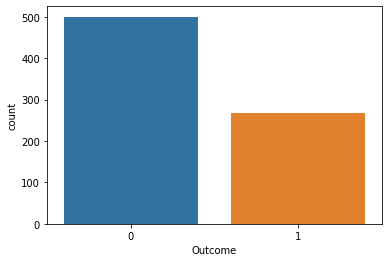

In [82]:
sns.countplot('Outcome',data=df)

**Observation:** We could see that the dataset is slightly imbalanced. From the above plot, it is visible that number of diabetes positives are lower than number of negatives.

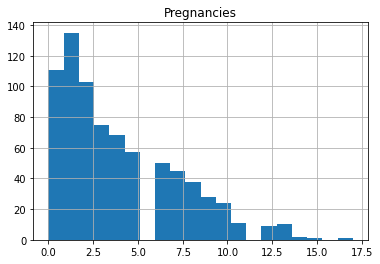

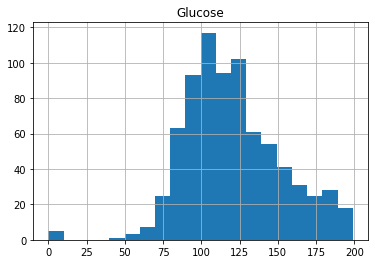

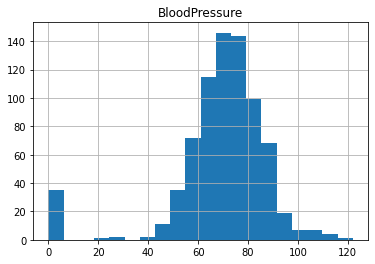

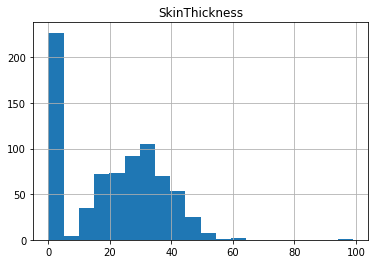

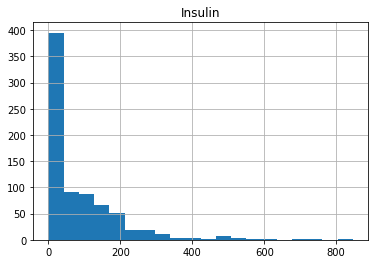

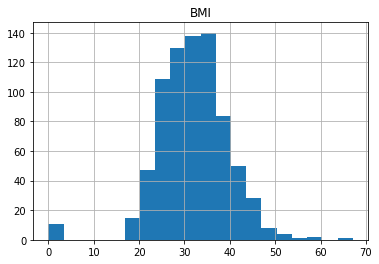

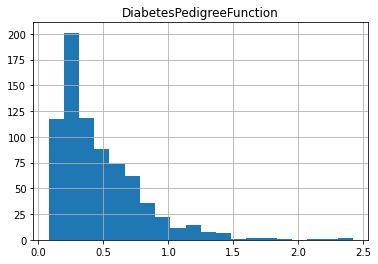

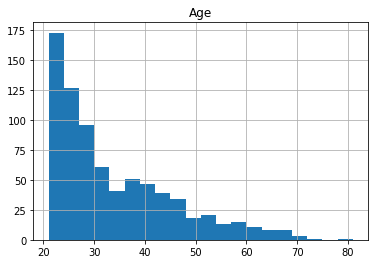

In [69]:
X=df.iloc[:,:-1]
for i in X.columns:
  X[i].hist(bins=20)
  plt.title(i)
  plt.show()

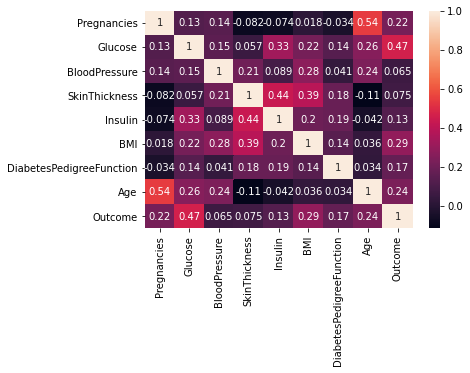

In [73]:
sns.heatmap(df.corr(),annot=True)

# **Data Preprocessing**

In [4]:
for i in df.columns:
  if 0 in df[i].unique() and i not in ['Outcome','Pregnancies']:
    print(i)

Glucose
BloodPressure
SkinThickness
Insulin
BMI


In [7]:
#Replacing Zeros with NuLL values for selected features
zero_cols=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
df[zero_cols]=df[zero_cols].replace(0,np.NaN)

In [9]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [10]:
#Replacing NaN values with mean
for i in zero_cols:
  df[i]=df[i].fillna(df[i].mean())

In [11]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# **Feature Scaling**

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_scaled=scaler.fit_transform(df)

In [21]:
Final=pd.DataFrame(df_scaled,columns=df.columns)
Final.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.170130,0.314928,0.234415,0.483333,1.0
1,0.058824,0.264516,0.428571,0.239130,0.170130,0.171779,0.116567,0.166667,0.0
2,0.470588,0.896774,0.408163,0.240798,0.170130,0.104294,0.253629,0.183333,1.0
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0.0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1.0


In [29]:
#Ignoring the features-SkinThickness,BloodPressure,DiabetesPedigreeFunction since they have weak correlation with Outcome.
X=Final.iloc[:,[0,1,4,5,7]]
y=Final.iloc[:,8:]
print(X.shape)
print(y.shape)

(768, 5)
(768, 1)


In [47]:
#Since the Target variable is imbalanced, using stratify to maintain the same ratio.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=df['Outcome'],random_state=40)

In [44]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(614, 5) (154, 5) (614, 1) (154, 1)


# **Data Modeling**

In [48]:
#Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

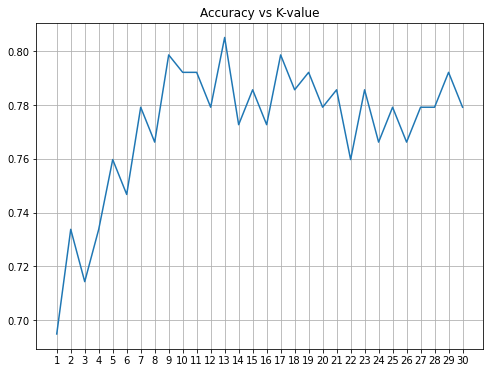

0.8051948051948052


In [49]:
#Finding the best K-value for KNN alogirthm
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
acc=[]
for i in range(1,31):
  model=KNeighborsClassifier(i)
  model.fit(X_train,y_train)
  preds=model.predict(X_test)
  acc.append(metrics.accuracy_score(preds,y_test))
plt.figure(figsize=(8,6))
plt.plot(list(range(1,31)),acc)
plt.title('Accuracy vs K-value')
plt.grid()
plt.xticks(range(1,31))
plt.show()
print(max(acc))

In [50]:
#KNN Algorithm
KNNmodel=KNeighborsClassifier(13)
KNNmodel.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [52]:
#Support Vector Classifier Algorithm
from sklearn.svm import SVC
svcmodel=SVC(random_state=40)
svcmodel.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=40, shrinking=True, tol=0.001,
    verbose=False)

In [55]:
from sklearn.naive_bayes import GaussianNB
nbmodel = GaussianNB()
nbmodel.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [57]:
from sklearn.tree import DecisionTreeClassifier
treemodel=DecisionTreeClassifier(random_state=40)
treemodel.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=40, splitter='best')

In [58]:
from sklearn.ensemble import RandomForestClassifier
randommodel=RandomForestClassifier()
randommodel.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# **Model Evaluation**

In [60]:
#Calculating Predictions
logmodel_pred=logmodel.predict(X_test)
KNNmodel_pred=KNNmodel.predict(X_test)
svcmodel_pred=svcmodel.predict(X_test)
nbmodel_pred=nbmodel.predict(X_test)
treemodel_pred=treemodel.predict(X_test)
randommodel_pred=randommodel.predict(X_test)

In [65]:
#Evaluating using metrics
from sklearn.metrics import accuracy_score
print('Logistic Regression accuracy - ',accuracy_score(logmodel_pred,y_test)*100)
print('KNN Model Accuracy - ',accuracy_score(KNNmodel_pred,y_test)*100)
print('SVC Model Accuracy - ',accuracy_score(svcmodel_pred,y_test)*100)
print('Naive Bayes Model Accuracy - ',accuracy_score(nbmodel_pred,y_test)*100)
print('Decison Tree Model Accuracy - ',accuracy_score(treemodel_pred,y_test)*100)
print('RadomForestClassifier Accuracy - ',accuracy_score(randommodel_pred,y_test)*100)

Logistic Regression accuracy -  75.32467532467533
KNN Model Accuracy -  80.51948051948052
SVC Model Accuracy -  77.27272727272727
Naive Bayes Model Accuracy -  77.27272727272727
Decison Tree Model Accuracy -  65.5844155844156
RadomForestClassifier Accuracy -  73.37662337662337


**From the above accuracy score, we can see KNN model gave the highest accuracy-80.5%**

In [66]:
from sklearn.metrics import confusion_matrix
confusion_matrix(KNNmodel_pred,y_test)

array([[85, 15],
       [15, 39]])

In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test,KNNmodel_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85       100
         1.0       0.72      0.72      0.72        54

    accuracy                           0.81       154
   macro avg       0.79      0.79      0.79       154
weighted avg       0.81      0.81      0.81       154

